# Echo State Network as a tunable frequency generator

This is a simplified implementation of Herbert Jaeger's task of learning a simple non-autonomous system, [a frequency generator controlled by an external signal](http://www.scholarpedia.org/article/Echo_state_network). Plots at the end.

[See the ESN implementation](https://github.com/cknd/pyESN).


In [1]:
import os 
os.chdir('..')
print("The current workding directory:", os.getcwd())

The current workding directory: /Users/sungjae/Projects/pyESN


In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from pyESN import ESN
from dataset.freq2wav import frequency_generator

## Task

The network will learn to generate a wave signal whose frequency is determined by some slowly changing control input.

#### 1) Generate some sample data:


In [3]:
randomstate = np.random.RandomState(42)

N = 15000 # signal length
min_period = 10 #[OriginalCode] 2
max_period = 18 #[OriginalCode] 10
n_changepoints = int(N/200)
frequency_control,frequency_output = frequency_generator(N,min_period,max_period,n_changepoints,randomstate)

traintest_cutoff = int(np.ceil(0.7*N))

train_ctrl, train_output = frequency_control[:traintest_cutoff],frequency_output[:traintest_cutoff]
test_ctrl, test_output  = frequency_control[traintest_cutoff:],frequency_output[traintest_cutoff:]

print("train_ctrl.shape", train_ctrl.shape)
print("train_output.shape", train_output.shape)
print("test_ctrl.shape", test_ctrl.shape)
print("test_output.shape", test_output.shape)

train_ctrl.shape (10500, 2)
train_output.shape (10500, 1)
test_ctrl.shape (4500, 2)
test_output.shape (4500, 1)


#### 2) Plot training and test datasets
First, a look at the control signal, the target signal and the output of the model both during training and during testing.

(-0.1, 1.1)

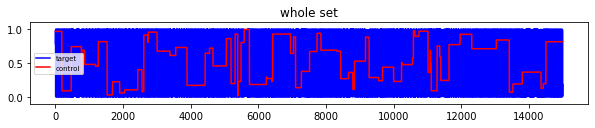

In [4]:
plt.figure(figsize=(10,1.5))
plt.plot(frequency_output,label='target',color='blue')
plt.plot(frequency_control[:,1],label='control',color='red')
plt.legend(fontsize='x-small')
plt.title('whole set')
plt.ylim([-0.1,1.1])

(-0.1, 1.1)

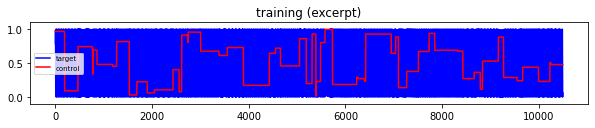

In [5]:
plt.figure(figsize=(10,1.5))
plt.plot(train_output,label='target',color='blue')
plt.plot(train_ctrl[:,1],label='control',color='red')
plt.legend(fontsize='x-small')
plt.title('training (excerpt)')
plt.ylim([-0.1,1.1])

(-0.1, 1.1)

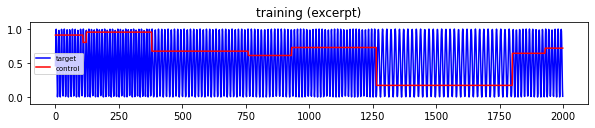

In [6]:
window_tr = range(int(len(train_output)/4),int(len(train_output)/4+2000))
plt.figure(figsize=(10,1.5))
plt.plot(train_output[window_tr],label='target',color='blue')
plt.plot(train_ctrl[window_tr,1],label='control',color='red')
plt.legend(fontsize='x-small')
plt.title('training (excerpt)')
plt.ylim([-0.1,1.1])

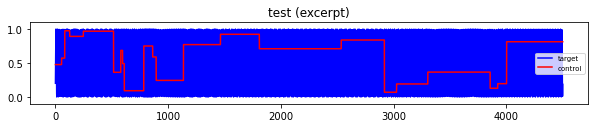

In [7]:
plt.figure(figsize=(10,1.5))
plt.plot(test_output[:],label='target',color='blue')
plt.plot(test_ctrl[:,1],label='control',color='red')
plt.legend(fontsize='x-small')
plt.title('test (excerpt)')
plt.ylim([-0.1,1.1]);

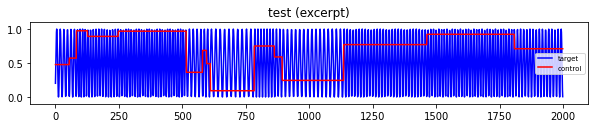

In [8]:
window_test = range(2000)
plt.figure(figsize=(10,1.5))
plt.plot(test_output[window_test],label='target',color='blue')
plt.plot(test_ctrl[window_test,1],label='control',color='red')
plt.legend(fontsize='x-small')
plt.title('test (excerpt)')
plt.ylim([-0.1,1.1]);

#### 3) Instantiate, train & test the network
Parameters are mostly the same as in Herbert Jaeger's original Matlab code. 

In [9]:
esn = ESN(n_inputs = 2,
          n_outputs = 1,
          n_reservoir = 200,
          spectral_radius = 0.25,
          sparsity = 0.95,
          noise = 0.001,
          input_shift = [0,0],
          input_scaling = [0.01, 3],
          teacher_scaling = 1.12,
          teacher_shift = -0.7,
          out_activation = np.tanh,
          inverse_out_activation = np.arctanh,
          random_state = randomstate,
          silent = False,
          concat_input2state = False)

pred_train = esn.fit(train_ctrl,train_output)

print("test error:")
pred_test = esn.predict(test_ctrl)
print(np.sqrt(np.mean((pred_test - test_output)**2)))

harvesting states...
fitting...
training error:
0.005637697605444798
test error:
0.44757555590795794
